# **Import the Libraries for the project** #

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

## **Load the Dataset** ##

In [2]:
df=pd.read_csv("house_price_mumbai.csv")

# **Remove the Cr and L and convert all into Cr value** #

# **Remove ',' from the column of prise Square-Feet** #

# **Remove East and West in Location** #

In [3]:
def Replace(text:str):
    if 'Cr' in text:
        value=float(text.replace(' Cr',''))
    elif 'L' in text:
        value=float(text.replace(' L',''))/100
    return value


In [4]:
def remove_Comma(str):
    value=''
    for i in str:
        if i != ',':
            value += i
    return int(value)

In [5]:
def Remove_East_west(text):
    # Remove east and west from the text
    text = text.replace(' east', '').replace(' west', '').replace(' EAST', '').replace(' WEST', '').replace(' East', '').replace(' West', '')
    return text

**Apply the Replace to Convert all value into Cr value in float DataType**

**Apply the Remove Comma to remove comma in Price_sqt**

**Apply the Remove_east_west to minimize**

In [6]:
df['price_cr']=df['price'].apply(Replace)
df['price_sqft']=df['price_sqft'].apply(remove_Comma)
df['Location']=df['Location'].apply(Remove_East_west)
df.drop(columns=['price', 'project', 'City'], inplace=True)


<h2>Get the insight of the data with describe and info<h2>

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3980 entries, 0 to 3979
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   BHK         3980 non-null   object 
 1   Location    3980 non-null   object 
 2   Total sqft  3980 non-null   int64  
 3   price_sqft  3980 non-null   int64  
 4   price_cr    3980 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 155.6+ KB


In [8]:
df.describe()

,Total sqft,price_sqft,price_cr
count,3980.000000,3980.000000,3980.000000
mean,895.417588,11938.309799,1.122412
std,688.831332,10154.348760,1.708743
min,127.000000,114.000000,0.012500
25%,590.000000,4818.500000,0.282950
50%,717.000000,9000.000000,0.640000
75%,1060.000000,16172.750000,1.330000
max,16000.000000,92592.000000,30.000000


# **Data pre-processing** #

In [9]:
values=pd.DataFrame(df['Location'].value_counts()).reset_index()
values.columns = ['Location', 'Count']
remove_this_rows=[]
for i in range(len(values)):
    if values['Count'][i] < 25:
        remove_this_rows.append(values['Location'][i])

df = df[~df['Location'].isin(remove_this_rows)].reset_index()

In [10]:
df.drop(columns=['index'], inplace=True)

# **Remove this rows for of Any other from the 1, 2, 3, 4, and 5 BHK and take into dataframe** #

In [11]:
values=pd.DataFrame(df['BHK'].value_counts()).reset_index()
remove_this_rows=['R','5 BHK Apartment', '5 BHK Independent House','1 BHK Independent House','3 BHK Independent House',
                  '3 BHK Villa', '2 BHK Independent Floor', '6 BHK Independent Floor', '2 RK Studio Apartment', '3 BHK Independent Floor',
                  '2 BHK Independent House']
values.columns = ['Location', 'Count']
df=df[~df['BHK'].isin(remove_this_rows)].reset_index()

In [12]:
df.drop(columns=['index'], inplace=True)

# **Fromate the 1, 2, 3, 4 and 5 such that mdoel and check only the this much data** #

In [13]:
def Df_to_fromat(text):
    list_need_to_append_BHK_Apartment=['1', '2', '3', '4', '5']
    if text in list_need_to_append_BHK_Apartment:
        return str(text) + ' BHK Apartment'
    return text

In [14]:
df['BHK']=df['BHK'].apply(Df_to_fromat)

# **Take the info from 1 BHK to 1 is the major info that i need for the project** #

In [15]:
def BHK_no(text):
    list_need_to_No_BHK_Apartment=['1', '2', '3', '4','5']
    for i in list_need_to_No_BHK_Apartment:
        if i in text:
            return int(i)
    

In [16]:
df['bhk_no']=df['BHK'].apply(BHK_no)

## **Conevrt the bhk_no form float to int32 data type** ##

In [17]:
df['bhk_no']=df['bhk_no'].convert_dtypes('int32')

In [18]:
df

,BHK,Location,Total sqft,price_sqft,price_cr,bhk_no
0,3 BHK Apartment,Chembur,984,31000,3.0500,3
1,2 BHK Apartment,Kurla,598,23913,1.4200,2
2,2 BHK Apartment,Malad,738,21000,1.5400,2
3,3 BHK Apartment,Rasayani,644,10676,0.6875,3
4,2 BHK Apartment,Neral,427,5756,0.2458,2
...,...,...,...,...,...,...
3375,2 BHK Apartment,Vasai,966,4968,0.4800,2
3376,1 BHK Apartment,Naigaon,500,5200,0.2600,1
3377,1 BHK Apartment,Naigaon,610,5573,0.3400,1
3378,1 BHK Apartment,Naigaon,610,5245,0.3200,1


## **Remove the outliers that affect the data** ##

In [19]:
def remove_bhk_outliers(df):
    exclue_index=np.array([])
    for location, location_df in df.groupby('Location'):
        bhk_stats={}
        for bhk, bhk_df in location_df.groupby('bhk_no'):
            bhk_stats[bhk]={
                'mean':bhk_df['price_sqft'].mean(),
                'std':bhk_df['price_sqft'].std(),
                'Count':bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk_no'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['Count']:
                exclue_index=np.append(exclue_index, bhk_df[bhk_df.price_sqft<(stats['mean'])].index.values)
        return df.drop(exclue_index, axis='index')

In [20]:
df2=remove_bhk_outliers(df)

In [21]:
df2

,BHK,Location,Total sqft,price_sqft,price_cr,bhk_no
0,3 BHK Apartment,Chembur,984,31000,3.0500,3
1,2 BHK Apartment,Kurla,598,23913,1.4200,2
2,2 BHK Apartment,Malad,738,21000,1.5400,2
3,3 BHK Apartment,Rasayani,644,10676,0.6875,3
4,2 BHK Apartment,Neral,427,5756,0.2458,2
...,...,...,...,...,...,...
3375,2 BHK Apartment,Vasai,966,4968,0.4800,2
3376,1 BHK Apartment,Naigaon,500,5200,0.2600,1
3377,1 BHK Apartment,Naigaon,610,5573,0.3400,1
3378,1 BHK Apartment,Naigaon,610,5245,0.3200,1


## **Let the scatter plot to find the data point and how they are relate**

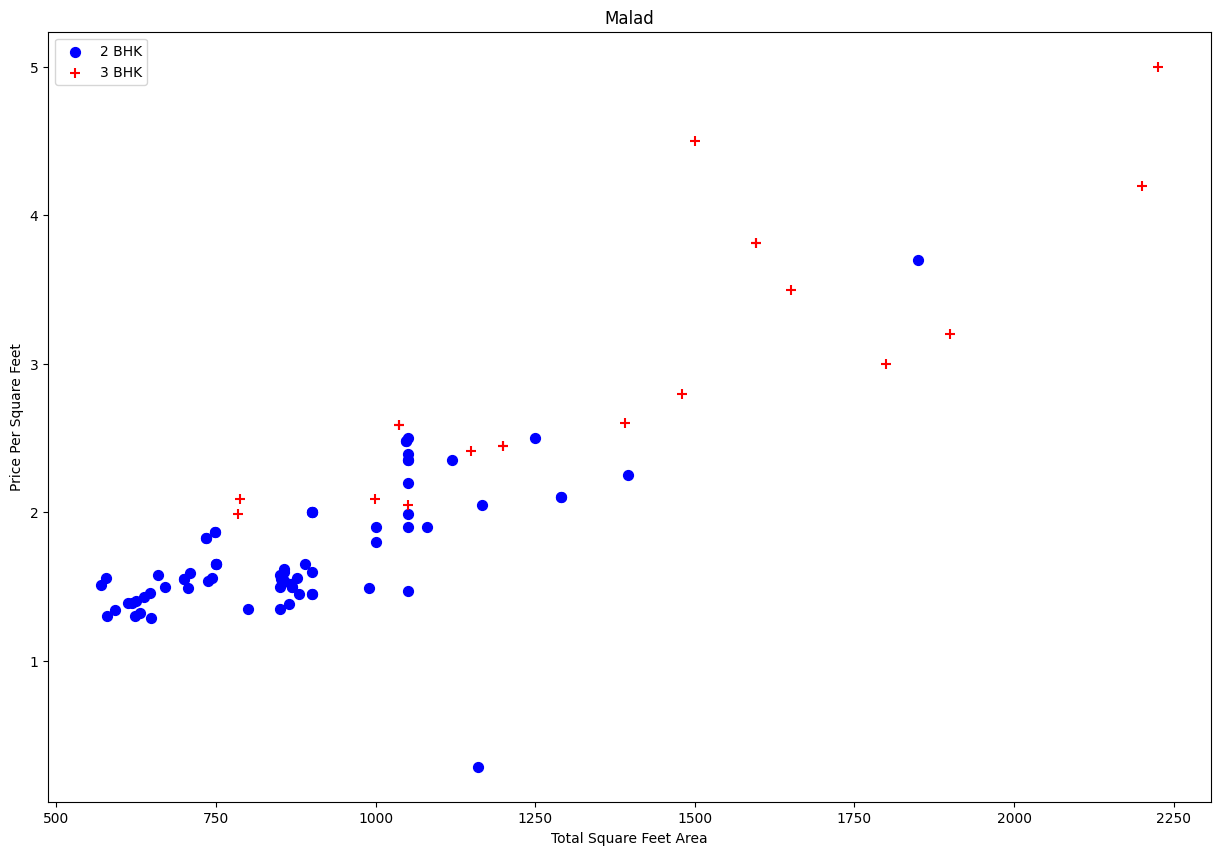

In [22]:
def plot_scatter_chart(df, location):
    bhk2=df[(df.Location==location) & (df.BHK=='2 BHK Apartment')]
    bhk3=df[(df.Location==location) & (df.BHK=='3 BHK Apartment')]
    plt.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2['Total sqft'], bhk2['price_cr'], color='b', label='2 BHK', s=50)
    plt.scatter(bhk3['Total sqft'], bhk3['price_cr'], marker='+', color='r', label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel('Price Per Square Feet')
    plt.title(location)
    plt.legend()
plot_scatter_chart(df2, 'Malad')


## **Price_per_sqft v/s Count Plot**

Text(0, 0.5, 'Count')

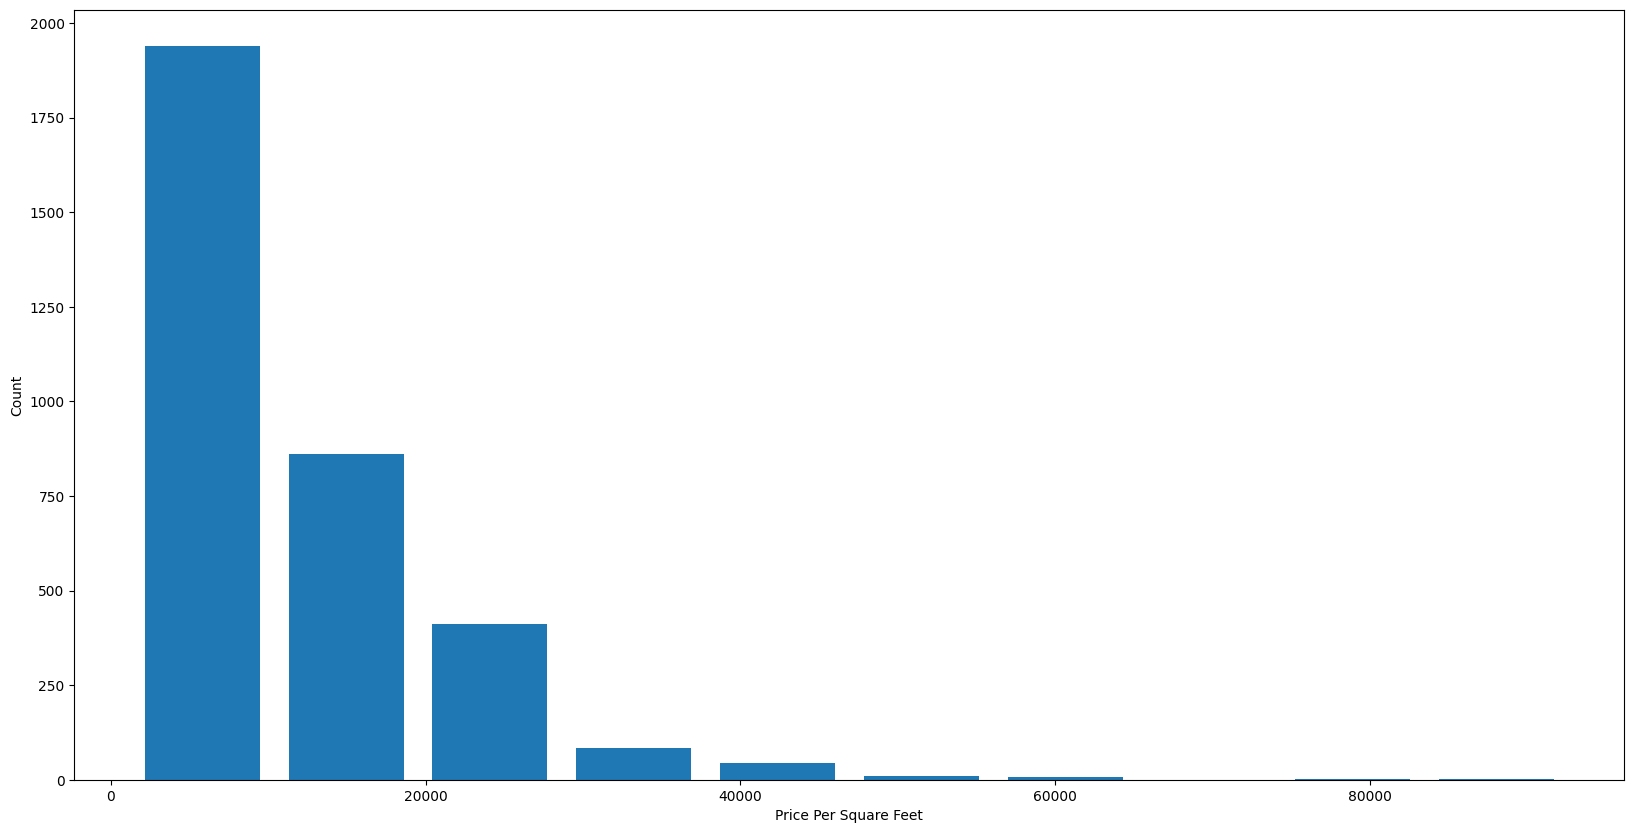

In [23]:
plt.rcParams['figure.figsize']=(20, 10)
plt.hist(df2.price_sqft, rwidth=.8)
plt.xlabel('Price Per Square Feet')
plt.ylabel('Count')

In [24]:
df2.drop(columns=['BHK'], inplace=True)

# **Dummy-Encoding and remove the first column** #

In [25]:
dummies=pd.get_dummies(df2['Location'], drop_first=True)

In [26]:
df3=pd.concat([df2, dummies], axis='columns')
df3

,Location,Total sqft,price_sqft,price_cr,bhk_no,Ambernath,Andheri,Badlapur,Bandra,Bhandup,...,Palghar,Panvel,Powai,Rasayani,Santacruz,Taloja,Thane,Ulwe,Vasai,Virar
0,Chembur,984,31000,3.0500,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Kurla,598,23913,1.4200,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Malad,738,21000,1.5400,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Rasayani,644,10676,0.6875,3,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,Neral,427,5756,0.2458,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3375,Vasai,966,4968,0.4800,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3376,Naigaon,500,5200,0.2600,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3377,Naigaon,610,5573,0.3400,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3378,Naigaon,610,5245,0.3200,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [27]:
df3.shape
df3.drop(columns=['Location'], inplace=True)

In [28]:
x=df3.drop('price_cr', axis='columns')
y=df3.price_cr

### **Split the data into train test for check which model is best for the project**

In [29]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=.2,random_state=10)

LinearRegression model i have find that it has Accuracy score of 94.6% but i want to check other also for get much better result

In [30]:
lr=LinearRegression()
lr.fit(x_train, y_train)
lr.score(x_test, y_test)

0.9467789255611055

Here the mdoel avg got 88.12 Accuracy but i can check more model to find such that we get better score

In [31]:
from sklearn.model_selection import ShuffleSplit, cross_val_score
cv=ShuffleSplit(n_splits=8, test_size=.2, random_state=0)
np.mean(cross_val_score(LinearRegression(), x, y, cv=cv))*100

88.12915856014436

Here i am using the GridSearchCV Work and i am using this model to train and which model get the better score
* Lasso
* LinearRegression
* DecisionTreeRegressor

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_the_best_model(x,y):
    algos={
        'Linear_Regression':{
            'Model':LinearRegression(),
            'Params':{
                'fit_intercept': [True, False],
                'copy_X': [True, False],
                'n_jobs': [-1, 1],
            }
        },
        'Lasso':{
            'Model':Lasso(),
            'Params':{
                'alpha':(0.1, 1.0, 10.0),
                'max_iter':(1000, 5000, 10000),
                'selection':['random', 'cyclic']
            }
        },
        'Decision_tree':{
            'Model':DecisionTreeRegressor(),
            'Params':{
                'criterion':['mse', 'friedman_mse'],
                'splitter':['best', 'random'],
                'max_depth':[3, 5, 10],
                'min_samples_split':[2, 5, 10],
                'min_samples_leaf':[1, 5, 10],
            }
        }
    }
    scores=[]
    cv=ShuffleSplit(n_splits=6, test_size=.2, random_state=0)
    for algo_name, config in algos.items():
        gs=GridSearchCV(config['Model'], config['Params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model':algo_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

Here we the DecisionTreeRegressor as 97.9% accuracy so i am using the model with this params


params= {
    
    criterion='friedman_mse',
    
    max_depth=10,
    
    min_samples_leaf=1, 
    
    min_samples_split=2, 
    
    splitter='random', 
    
    random_state=30
}

This parameter is and it score max among all

In [33]:
x=df3.drop('price_cr', axis='columns')
y=df3.price_cr
best_scores=find_the_best_model(x, y)

C:\Users\Manav Darji\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
324 fits failed out of a total of 648.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
324 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Manav Darji\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Manav Darji\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\

In [34]:
params=best_scores['best_params'][2]

In [35]:
params

{'criterion': 'friedman_mse',
 'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'splitter': 'random'}

In [36]:
model_decision_tree=DecisionTreeRegressor(criterion='friedman_mse', max_depth=10, min_samples_leaf=1, min_samples_split=2, splitter='random', random_state=30)

model_decision_tree.fit(x_train,y_train)
model_decision_tree.score(x_test, y_test)

0.9790633929814301

Check with random data to find the price

In [37]:
import math
def predict_price(location, price_sqft, bhk_no, total_sqft):
    loc_index=np.where(x.columns==location)[0][0]
    Data=np.zeros(len(x.columns))
    Data[0]=total_sqft
    Data[1]=price_sqft
    Data[3]=bhk_no
    if loc_index>=0:
        Data[loc_index]=1
    return math.ceil(model_decision_tree.predict([Data])[0]*1_00_00_000)

predict_price('Ambernath',31000, 984, 2)

C:\Users\Manav Darji\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


7241118

Convert this model into pickel file

In [38]:
# import pickle
# with open('Mumbai-price-pridection.pickle','wb') as f:
#     pickle.dump(model_decision_tree, f)